In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
%matplotlib notebook
import ipywidgets as widgets
from ipywidgets import interact

## W,b slider

<IPython.core.display.Javascript object>


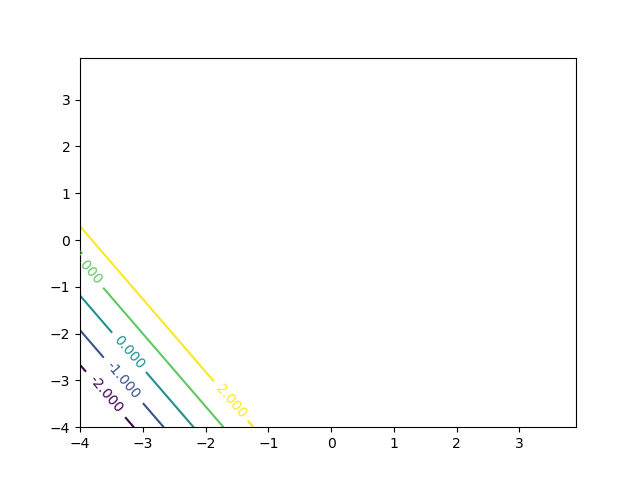

interactive(children=(FloatSlider(value=1.0, description='w1', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

In [3]:
fig,ax = plt.subplots(1,1)

delta=.1
x_grid, y_grid = np.meshgrid(np.arange(-4, 4, delta), np.arange(-4, 4, delta))


def contour_plot(w1=1,w2=1,b=0,alpha=1):
    plt.cla()
    model_grid = w1*x_grid+w2*y_grid+b

    # contour
    cs = ax.contour(x_grid, y_grid, model_grid, [-10,-5,-1,0,1,5,10])
    plt.clabel(cs);
    plt.show()

contour_plot()
    
def update(w1, w2, b, alpha):
    plt.cla()
    model_grid = alpha*w1*x_grid+alpha*w2*y_grid+b

    # contour
    cs = ax.contour(x_grid, y_grid, model_grid, [-2,-1,0,1,2])
    plt.clabel(cs);
    fig.show()
        
interact(update, w1=widgets.FloatSlider(min=-10.0,max=10.0,value=1.0),
                 w2=widgets.FloatSlider(min=-10.0,max=10.0,value=1.0),
                 b=widgets.FloatSlider(min=-10.0,max=10.0,value=0),
                 alpha=widgets.FloatSlider(min=0,max=10.0,value=1.0));

## C slider

<IPython.core.display.Javascript object>


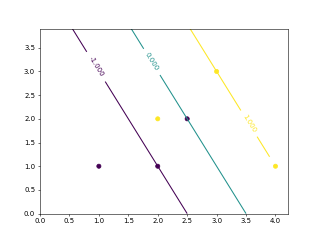

interactive(children=(FloatSlider(value=1.0, description='cur_c', max=50.0, min=0.001), ToggleButton(value=Fal…

In [5]:
%matplotlib notebook
x_train = np.array([
    [1,1],
    [2,1],
    [3,3],
    [4,1],
    [2,2],
     [2.5,2], #really good non-seperable example
#    [2.5,1.5], #really good seperable example
])
y_train = np.array([0,0,1,1,1,0])
        
fig, ax = plt.subplots(1,1)
# grid
delta=.1
x_grid, y_grid = np.meshgrid(np.arange(0, 4, delta), np.arange(0, 4, delta))
grid_dataset = np.hstack([x_grid.reshape(-1,1),y_grid.reshape(-1,1)])

def contour(cur_c):
    plt.cla()
    fitted_model = SVC(kernel='linear', C=cur_c).fit(x_train,y_train)
    out = fitted_model.decision_function(grid_dataset)

    # points
    ax.scatter(x_train[:,0],x_train[:,1], c=y_train);

    # contour
    model_grid = out.reshape(x_grid.shape)
    cs = ax.contour(x_grid, y_grid, model_grid, [-1,0,1])
    plt.clabel(cs);
    fig.show()

contour(1)

def update(cur_c,kernel_toggle=False):
    if kernel_toggle:
        cur_kernel = 'rbf'
    else:
        cur_kernel = 'linear'
    plt.cla()
    fitted_model = SVC(kernel=cur_kernel, C=cur_c).fit(x_train,y_train)
    out = fitted_model.decision_function(grid_dataset)

    # points
    ax.scatter(x_train[:,0],x_train[:,1], c=y_train);

    # contour
    model_grid = out.reshape(x_grid.shape)
    cs = ax.contour(x_grid, y_grid, model_grid, [-1,0,1])
    plt.clabel(cs);
    fig.show()
        
interact(update, cur_c=widgets.FloatSlider(min=.001,max=50,value=1, step=.1),
                kernel_toggle = widgets.ToggleButton(value=False, description="RBF"));

## Gamma slider

<IPython.core.display.Javascript object>


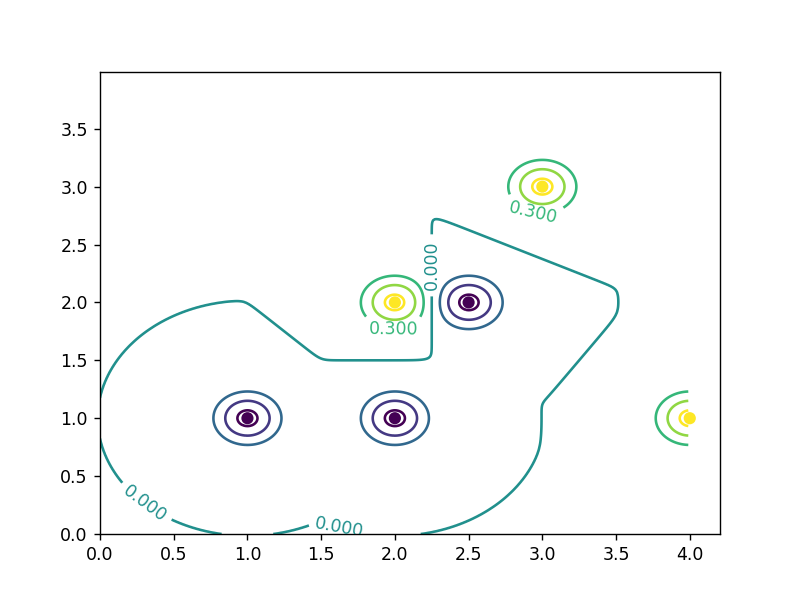

interactive(children=(FloatSlider(value=1.0, description='cur_c', max=50.0, min=0.001), FloatSlider(value=1.0, description='gamma', max=50.0, min=0.001), Output()), _dom_classes=('widget-interact',))

In [12]:
x_train = np.array([
    [1,1],
    [2,1],
    [3,3],
    [4,1],
    [2,2],
     [2.5,2], #really good non-seperable example
#    [2.5,1.5], #really good seperable example
])
y_train = np.array([0,0,1,1,1,0])
        
fig, ax = plt.subplots(1,1)
# grid
delta=.01
x_grid, y_grid = np.meshgrid(np.arange(0, 4, delta), np.arange(0, 4, delta))
grid_dataset = np.hstack([x_grid.reshape(-1,1),y_grid.reshape(-1,1)])

def contour(cur_c):
    plt.cla()
    fitted_model = SVC(kernel='linear', C=cur_c).fit(x_train,y_train)
    out = fitted_model.decision_function(grid_dataset)

    # points
    ax.scatter(x_train[:,0],x_train[:,1], c=y_train);

    # contour
    model_grid = out.reshape(x_grid.shape)
    cs = ax.contour(x_grid, y_grid, model_grid, [-1,0,1])
    plt.clabel(cs);
    fig.show()

contour(1)

def update(cur_c,gamma=0):
    cur_kernel = 'rbf'
    plt.cla()
    fitted_model = SVC(kernel=cur_kernel, C=cur_c, gamma=gamma).fit(x_train,y_train)
    out = fitted_model.decision_function(grid_dataset)

    # points
    ax.scatter(x_train[:,0],x_train[:,1], c=y_train);

    # contour
    model_grid = out.reshape(x_grid.shape)
    cs = ax.contour(x_grid, y_grid, model_grid)
    plt.clabel(cs);
    fig.show()
        
interact(update, cur_c=widgets.FloatSlider(min=.001,max=50,value=1, step=.1),
                gamma=widgets.FloatSlider(min=.001,max=50,value=1, step=.1));